#**Book Recommendation System**

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

### Read Data

In [ ]:
df = pd.read_csv('books.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [ ]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


**Check for null values in DataSet**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
subtitle,4429
thumbnail,329
description,262
categories,99
authors,72
average_rating,43
ratings_count,43
num_pages,43
published_year,6
title,0


**Most of the missing values are in Subtitle**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

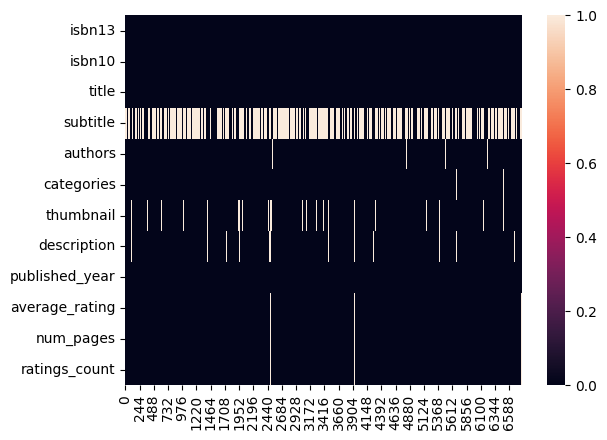

In [ ]:
sns.heatmap(df.isnull().transpose())

***Chart for missing values***

In [ ]:
df['missing_desc'] = np.where(df['description'].isnull(),1,0)

In [ ]:
df['missing_desc'].value_counts()

,count
missing_desc,
0,6548
1,262


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
 12  missing_desc    6810 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 691.8+ KB


*now we only need these columns [description, num_pages, average_rating, publish_year]*

In [ ]:
books_clean = df[~(df["description"].isna()) &
                    ~(df["num_pages"].isna()) &
                    ~(df["average_rating"].isna()) &
                    ~(df["published_year"].isna())]


In [ ]:
books_clean.shape

(6507, 13)

In [ ]:
books_clean.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,4226
authors,63
categories,33
thumbnail,214
description,0
published_year,0
average_rating,0


In [ ]:
books_clean["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,"Adventure stories, English",1
518,Germany,1
517,Egypt,1
516,Apartments,1


In [ ]:
books_clean.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0


## Check for the Book Description

In [ ]:
books_clean['words_in_desc'] = books_clean['description'].str.split().str.len()

<ipython-input-17-1181950319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean['words_in_desc'] = books_clean['description'].str.split().str.len()


In [ ]:
books_clean['words_in_desc'].value_counts()

,count
words_in_desc,
36,152
35,143
33,140
38,140
37,140
...,...
326,1
450,1
619,1


In [ ]:
books_clean_desc = books_clean[books_clean["words_in_desc"] >= 25]

In [ ]:
books_clean_desc['words_in_desc'].value_counts()

,count
words_in_desc,
36,152
35,143
37,140
33,140
38,140
...,...
402,1
357,1
404,1


### All of the description is now valid

In [ ]:
books_clean_desc.shape

(5197, 14)

In [ ]:
books_clean_desc.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,words_in_desc
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,75


In [ ]:
books_clean_desc["title_and_subtitle"] = (
    np.where(books_clean_desc["subtitle"].isna(), books_clean_desc["title"],
             books_clean_desc[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

<ipython-input-23-4042312517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean_desc["title_and_subtitle"] = (


In [ ]:
books_clean_desc.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,words_in_desc,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,75,The Problem of Pain


In [ ]:
books_clean_desc['isbn_desc'] = books_clean_desc[['isbn13','description']].astype(str).agg(" ".join, axis=1)

<ipython-input-25-590305121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean_desc['isbn_desc'] = books_clean_desc[['isbn13','description']].astype(str).agg(" ".join, axis=1)


In [ ]:
books_clean_desc.sample(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,words_in_desc,title_and_subtitle,isbn_desc
2569,9780425161739,0425161730,Virtual Vandals,NaN,Tom Clancy;Steve R. Pieczenik;Diane Duane,Fiction,http://books.google.com/books/content?id=gU7Ju...,Here comes a Clancy first: a new series of nov...,1999.0,4.00,192.0,3236.0,0,31,Virtual Vandals,9780425161739 Here comes a Clancy first: a new...
6643,9781883011079,1883011078,Raymond Chandler: Stories & Early Novels (LOA ...,"Pulp Stories / the Big Sleep / Farewell, My Lo...",Raymond Chandler,"Detective and mystery stories, American",NaN,"In Raymond Chandler's hands, the pulp crime st...",1995.0,4.49,1199.0,1296.0,0,326,Raymond Chandler: Stories & Early Novels (LOA ...,"9781883011079 In Raymond Chandler's hands, the..."
1743,9780340637876,0340637870,How the Irish Saved Civilization,The Untold Story of Ireland's Heroic Role from...,Thomas Cahill,Books,http://books.google.com/books/content?id=xV5CP...,Ireland played the central role in maintaining...,1995.0,3.81,256.0,88.0,0,105,How the Irish Saved Civilization: The Untold S...,9780340637876 Ireland played the central role ...
5931,9781421502793,1421502798,Maison Ikkoku,NaN,Rumiko Takahashi,Comics & Graphic Novels,http://books.google.com/books/content?id=-CpgQ...,From the creator of RANMA 1/2 and INUYASHA com...,2006.0,4.35,208.0,251.0,0,96,Maison Ikkoku,9781421502793 From the creator of RANMA 1/2 an...
2656,9780434009053,0434009059,The Hannibal Lecter Trilogy,NaN,Thomas Harris,"Lecter, Hannibal (Fictitious character)",http://books.google.com/books/content?id=rsmgQ...,"Red Dragon, The Silence of the Lambs and Hanni...",2001.0,4.42,1222.0,789.0,0,30,The Hannibal Lecter Trilogy,"9780434009053 Red Dragon, The Silence of the L..."


In [ ]:
books_clean_desc.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,3380
authors,32
categories,30
thumbnail,166
description,0
published_year,0
average_rating,0


In [ ]:
clean_books = books_clean_desc.drop(columns=['subtitle','missing_desc','words_in_desc']).to_csv('clean_books.csv', index=False)

# Next Step

**Now importing other Libraries**

In [ ]:
!pip install langchain_community
!pip install langchain_chroma
!pip install langchain_text_splitters
!pip install langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

In [ ]:
new_df = pd.read_csv('clean_books.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isbn13              5197 non-null   int64  
 1   isbn10              5197 non-null   object 
 2   title               5197 non-null   object 
 3   authors             5165 non-null   object 
 4   categories          5167 non-null   object 
 5   thumbnail           5031 non-null   object 
 6   description         5197 non-null   object 
 7   published_year      5197 non-null   float64
 8   average_rating      5197 non-null   float64
 9   num_pages           5197 non-null   float64
 10  ratings_count       5197 non-null   float64
 11  title_and_subtitle  5197 non-null   object 
 12  isbn_desc           5197 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 527.9+ KB


In [ ]:
new_df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
authors,32
categories,30
thumbnail,166
description,0
published_year,0
average_rating,0
num_pages,0


In [ ]:
new_df['isbn_desc'].to_csv('isbn_desc.txt', index=False, header=False, sep='\n')

In [ ]:
raw_documents = TextLoader("isbn_desc.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(raw_documents)

Streaming output truncated to the last 5000 lines.


In [ ]:
documents[0]

Document(metadata={'source': 'isbn_desc.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a

In [ ]:
!pip install langchain huggingface_hub

In [ ]:
from langchain.vectorstores import Chroma

In [ ]:

from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

db_books = Chroma.from_documents(
    documents=documents,
    embedding=embedding_model
)


<ipython-input-38-3967991158>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
query = 'A book to teach achildern about nature'
docs = db_books.similarity_search(query)
docs

[Document(metadata={'source': 'isbn_desc.txt'}, page_content="9780060959036 Barbara Kingsolver's fifth novel is a hymn to wildness that celebrates the prodigal spirit of human nature, and of nature itself. It weaves together three stories of human love within a larger tapestry of lives amid the mountains and farms of southern Appalachia. Over the course of one humid summer, this novel's intriguing protagonists face disparate predicaments but find connections to one another and to the flora and fauna with which they necessarily share a place."),
 Document(metadata={'source': 'isbn_desc.txt'}, page_content="9780374522599 The Control of Nature is John McPhee's bestselling account of places where people are locked in combat with nature. Taking us deep into these contested territories, McPhee details the strageties and tactics through which people attempt to control nature. Most striking is his depiction of the main contestants: nature in complex and awesome guises, and those attempting to 

In [ ]:
def retrieve_semantic_recommendations(query: str, top_k: int = 10) -> pd.DataFrame:
    recs = db_books.similarity_search_with_score(query, k=top_k)

    # Sort by score (lower = more similar)
    sorted_recs = sorted(recs, key=lambda x: x[1])  # x[0] = Document, x[1] = score

    # Extract ISBNs from sorted documents
    books_list = [
        int(doc.page_content.strip('"').split()[0])
        for doc, score in sorted_recs
    ]

    return df[df["isbn13"].isin(books_list)]


In [ ]:
retrieve_semantic_recommendations('A book to teach achildern about nature')

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc
71,9780007151240,0007151241,The Family Way,NaN,Tony Parsons,Parenthood,http://books.google.com/books/content?id=dJEIx...,It should be the most natural thing in the wor...,2005.0,3.51,400.0,2095.0,0
262,9780060776091,0060776099,Brave New World and Brave New World Revisited,NaN,Aldous Huxley,Fiction,http://books.google.com/books/content?id=3h9eN...,"The astonishing novel Brave New World, origina...",2005.0,4.16,340.0,123044.0,0
377,9780060959036,0060959037,Prodigal Summer,A Novel,Barbara Kingsolver,Fiction,http://books.google.com/books/content?id=06IwG...,Barbara Kingsolver's fifth novel is a hymn to ...,2001.0,4.00,444.0,85440.0,0
1225,9780192862099,019286209X,The Origins of Life,From the Birth of Life to the Origin of Language,John Maynard Smith;Eörs Szathmáry,Science,http://books.google.com/books/content?id=nHDbB...,'I can recommend this book as a thoroughly int...,2000.0,4.11,192.0,41.0,0
2030,9780374522599,0374522596,The Control of Nature,NaN,John McPhee,Nature,http://books.google.com/books/content?id=p1qKQ...,The Control of Nature is John McPhee's bestsel...,1990.0,4.24,288.0,3365.0,0
2358,9780387987200,0387987207,Leaps of Faith,"Science, Miracles, and the Search for Supernat...",Nicholas Humphrey,Medical,http://books.google.com/books/content?id=V-9-I...,"""Elegant and literate"" -THE TIMES OF LONDON ""T...",1999.0,3.76,244.0,20.0,0
2395,9780393315110,0393315118,Uncommon Ground: Rethinking the Human Place in...,NaN,William Cronon,Law,http://books.google.com/books/content?id=w04mj...,"Essays by revisionist historians, scientists, ...",1996.0,4.16,560.0,649.0,0
2441,9780393959055,0393959058,"Walden ; And, Resistance to Civil Government","Authoritative Texts, Thoreau's Journal, Review...",Henry David Thoreau,Literary Collections,http://books.google.com/books/content?id=uVxnQ...,The classic chronicle of a communion with natu...,1992.0,3.95,482.0,232.0,0
2864,9780446518628,044651862X,The Celestine Prophecy,An Adventure,James Redfield,Fiction,http://books.google.com/books/content?id=UXolx...,You have never read a book like this before --...,1994.0,3.63,247.0,1280.0,0
3042,9780451456816,0451456815,Not of Woman Born,NaN,Constance Ash;Robert A. Silverberg,Fiction,http://books.google.com/books/content?id=nOEIA...,A collection of stories that detail modern sci...,1999.0,3.80,288.0,59.0,0


## Now Move Further

In [ ]:
import pandas as pd
books = pd.read_csv("clean_books.csv")

In [ ]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Literary Criticism & Collections,1
475,"Authors, Canadian",1
476,Air pilots,1
477,Community life,1


In [ ]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Religion,117
6,Philosophy,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [ ]:
books[books["categories"] == "Juvenile Fiction"]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...
79,9780020442608,0020442602,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,The voyage of the Dawn Treader,"9780020442608 The ""Dawn Treader"" is the first ..."
85,9780030547744,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,Where the Red Fern Grows: The Story of Two Dog...,9780030547744 A young boy living in the Ozarks...
86,9780060000141,0060000147,Poppy's Return,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,Poppy's Return,"9780060000141 There's trouble at Gray House, t..."
87,9780060001537,0060001534,Diary of a Spider,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,Diary of a Spider,9780060001537 This is the diary ... of a spide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,9781590385814,1590385810,Fablehaven,Brandon Mull,Juvenile Fiction,http://books.google.com/books/content?id=tbVIP...,When Kendra and Seth go to stay at their grand...,2006.0,4.09,351.0,111896.0,Fablehaven,9781590385814 When Kendra and Seth go to stay ...
4930,9781596792500,1596792507,Sherlock Holmes and the Case of the Hound of t...,Arthur Conan Doyle;Malvina G. Vogel,Juvenile Fiction,http://books.google.com/books/content?id=EWgWP...,Sherlock Holmes and Dr. Watson travel to the b...,2005.0,4.51,237.0,28.0,Sherlock Holmes and the Case of the Hound of t...,9781596792500 Sherlock Holmes and Dr. Watson t...
4942,9781599900056,159990005X,The Drift House,Dale Peck,Juvenile Fiction,http://books.google.com/books/content?id=kbwPY...,Sent to stay with their uncle in a ship-like h...,2006.0,3.64,437.0,595.0,The Drift House: The First Voyage,9781599900056 Sent to stay with their uncle in...
5010,9781844580514,1844580512,Attack of the Jaguar,M. A. Harvey,Juvenile Fiction,http://books.google.com/books/content?id=3HUdt...,This training manual for operatives of Xtreme ...,2004.0,3.40,125.0,4.0,Attack of the Jaguar,9781844580514 This training manual for operati...


In [ ]:
books[books["categories"] == "Juvenile Nonfiction"]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc
107,9780060277406,0060277408,The Secret Garden Cookbook,Amy Cotler,Juvenile Nonfiction,http://books.google.com/books/content?id=c7E_H...,Frances Hodgson Burnett's The Secret Garden de...,1999.0,4.28,128.0,142.0,The Secret Garden Cookbook: Recipes Inspired b...,9780060277406 Frances Hodgson Burnett's The Se...
108,9780060278427,0060278420,Laura's Album,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=_zTkq...,Though best known as the author of the Little ...,1998.0,4.30,80.0,713.0,Laura's Album: A Remembrance Scrapbook of Laur...,9780060278427 Though best known as the author ...
228,9780060782139,0060782137,Time For Kids: Butterflies!,Editors of TIME For Kids,Juvenile Nonfiction,http://books.google.com/books/content?id=OdZxn...,"Butterflies There are 20,000 different kinds o...",2006.0,4.00,32.0,20.0,Time For Kids: Butterflies!,"9780060782139 Butterflies There are 20,000 dif..."
267,9780060882600,0060882603,The Annotated Charlotte's Web,E. B. White,Juvenile Nonfiction,http://books.google.com/books/content?id=vaYYH...,"Charlotte's Web, one of America's best-loved c...",2006.0,4.16,320.0,41.0,The Annotated Charlotte's Web,"9780060882600 Charlotte's Web, one of America'..."
434,9780064462044,0064462048,My Little House Crafts Book,Carolyn Strom Collins,Juvenile Nonfiction,http://books.google.com/books/content?id=lTzrs...,Make the same pioneer crafts that Laura did! I...,1998.0,4.05,64.0,56.0,My Little House Crafts Book: 18 Projects from ...,9780064462044 Make the same pioneer crafts tha...
435,9780064462341,006446234X,Pioneer Girl,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=Sj4UD...,The pioneer spirit lives on... Readers around ...,2000.0,4.15,32.0,414.0,Pioneer Girl: The Story of Laura Ingalls Wilder,9780064462341 The pioneer spirit lives on... R...
439,9780066236179,0066236177,A Light in the Attic Book and CD,Shel Silverstein,Juvenile Nonfiction,http://books.google.com/books/content?id=FJfQs...,Last night while I lay thinking here Some What...,2001.0,4.34,176.0,590.0,A Light in the Attic Book and CD,9780066236179 Last night while I lay thinking ...
812,9780142302279,0142302279,Dirty Beasts,Roald Dahl,Juvenile Nonfiction,NaN,Poems tell the stories of a smart pig who outw...,2002.0,4.02,32.0,3953.0,Dirty Beasts,9780142302279 Poems tell the stories of a smar...
821,9780142407226,0142407224,The Tough Guide to Fantasyland,Diana Wynne Jones,Juvenile Nonfiction,http://books.google.com/books/content?id=v5jxA...,A unique guide to fantasy literature helps rea...,2006.0,3.94,234.0,3897.0,The Tough Guide to Fantasyland,9780142407226 A unique guide to fantasy litera...
823,9780142407929,0142407925,The BFG,Roald Dahl;David Wood;Jane Walmsley,Juvenile Nonfiction,http://books.google.com/books/content?id=aDf-O...,"With notes on staging, props, and costumes, a ...",2007.0,4.26,128.0,452.0,The BFG: A Set of Plays,"9780142407929 With notes on staging, props, an..."


In [ ]:
category_mapping = {'Fiction' : "Fiction",
 'Juvenile Fiction': "Children's Fiction",
 'Biography & Autobiography': "Nonfiction",
 'History': "Nonfiction",
 'Literary Criticism': "Nonfiction",
 'Philosophy': "Nonfiction",
 'Religion': "Nonfiction",
 'Comics & Graphic Novels': "Fiction",
 'Drama': "Fiction",
 'Juvenile Nonfiction': "Children's Nonfiction",
 'Science': "Nonfiction",
 'Poetry': "Fiction"}

books["simple_categories"] = books["categories"].map(category_mapping)

In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [ ]:
books[~(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [ ]:
from transformers import pipeline

fiction_categories = ["Fiction", "Nonfiction"]

pipe = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=0
)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[0]

In [ ]:
pipe(sequence, fiction_categories)

In [ ]:
import numpy as np
max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label = pipe(sequence, fiction_categories)["labels"][max_index]
max_label

In [ ]:
def generate_predictions(sequence, categories):
    predictions = pipe(sequence, categories)
    max_index = np.argmax(predictions["scores"])
    max_label = predictions["labels"][max_index]
    return max_label

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

for i in tqdm(range(0, 100)):
    sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Fiction"]

In [ ]:
for i in tqdm(range(0, 100)):
    sequence = books.loc[books["simple_categories"] == "Nonfiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Nonfiction"]

In [ ]:
predictions_df = pd.DataFrame({"actual_categories": actual_cats, "predicted_categories": predicted_cats})

In [ ]:
predictions_df

In [ ]:
predictions_df["correct_prediction"] = (
    np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)
)

In [ ]:
predictions_df["correct_prediction"].sum() / len(predictions_df)

In [ ]:
isbns = []
predicted_cats = []

missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [ ]:
for i in tqdm(range(0, len(missing_cats))):
    sequence = missing_cats["description"][i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    isbns += [missing_cats["isbn13"][i]]

100%|██████████| 1454/1454 [02:00<00:00, 12.06it/s]


In [ ]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_cats})
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1449,9788125026600,Nonfiction
1450,9788171565641,Fiction
1451,9788172235222,Fiction
1452,9788173031014,Nonfiction


In [ ]:
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [ ]:
books[books["categories"].str.lower().isin([
    "romance",
    "science fiction",
    "scifi",
    "fantasy",
    "horror",
    "mystery",
    "thriller",
    "comedy",
    "crime",
    "historical"
])]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
24,9780006513087,0006513085,Gravity,Tess Gerritsen,Science fiction,http://books.google.com/books/content?id=KI66c...,Emma Watson a research physician has been trai...,2004.0,4.04,342.0,8024.0,Gravity,9780006513087 Emma Watson a research physician...,Nonfiction
475,9780099410355,0099410354,Traitor,Matthew Woodring Stover,Science fiction,http://books.google.com/books/content?id=VbICO...,"From the depths of catastrophe, a glimmer of h...",2002.0,4.00,320.0,6765.0,Traitor,"9780099410355 From the depths of catastrophe, ...",Fiction
478,9780099422341,0099422344,Yeats is Dead!,Joseph O'Connor,Comedy,http://books.google.com/books/content?id=DrE3I...,"In aid of Amnesty International, this is a bri...",2002.0,3.39,298.0,34.0,Yeats is Dead!: A Novel by Fifteen Irish Writers,"9780099422341 In aid of Amnesty International,...",Fiction
491,9780099446729,0099446723,Blackwood Farm,Anne Rice,Horror,http://books.google.com/books/content?id=cIn8T...,"Lestat Is Back, Saviour And Demon, Presiding O...",2003.0,3.86,774.0,26145.0,Blackwood Farm,"9780099446729 Lestat Is Back, Saviour And Demo...",Fiction
1090,9780261102422,0261102427,The Silmarillion,John Ronald Reuel Tolkien,Fantasy,http://books.google.com/books/content?id=22ePu...,Tolkien's Silmarillion is the core work of the...,1999.0,3.91,384.0,253.0,The Silmarillion,9780261102422 Tolkien's Silmarillion is the co...,Fiction
1435,9780340837955,0340837950,Stranger in a Strange Land,Robert A. Heinlein,Science fiction,http://books.google.com/books/content?id=ZQhiP...,"Epic, entertaining, Stranger in a Strange Land...",2005.0,3.92,672.0,563.0,Stranger in a Strange Land,"9780340837955 Epic, entertaining, Stranger in ...",Fiction
1439,9780345251220,0345251229,Visions from Nowhere,William Arrow,Science fiction,NaN,"The first novel in the series, ""Return to the ...",1976.0,3.23,183.0,10.0,Visions from Nowhere,"9780345251220 The first novel in the series, ""...",Fiction
2845,9780575075597,0575075597,Replay,Ken Grimwood,Fantasy,http://books.google.com/books/content?id=9vmNP...,At forty-three Jeff Winston is tired of his lo...,2005.0,4.16,272.0,412.0,Replay,9780575075597 At forty-three Jeff Winston is t...,Fiction
2860,9780590254762,0590254766,"The lion, the witch and the wardrobe",Clive Staples Lewis,Fantasy,NaN,Four English school children enter the magic l...,1995.0,4.21,189.0,860.0,"The lion, the witch and the wardrobe",9780590254762 Four English school children ent...,Nonfiction
3288,9780739423851,0739423851,Wizard's Castle,Diana Wynne Jones,Fantasy,http://books.google.com/books/content?id=hB7hA...,Howl's moving castle - Eldest of three sisters...,2002.0,4.44,376.0,439.0,Wizard's Castle,9780739423851 Howl's moving castle - Eldest of...,Fiction


In [ ]:
books.to_csv("books_with_categories.csv", index=False)

## Last Part

In [ ]:
import pandas as pd
books = pd.read_csv("books_with_categories.csv")

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k = None,
                      device = 0)
classifier("I love this!")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.00852868054062128},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.0020923891570419073},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.00041385178337804973}]]

In [ ]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [ ]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548413634300232},
  {'label': 'neutral', 'score': 0.16985207796096802},
  {'label': 'sadness', 'score': 0.11640888452529907},
  {'label': 'surprise', 'score': 0.02070062793791294},
  {'label': 'disgust', 'score': 0.019100705161690712},
  {'label': 'joy', 'score': 0.015161297284066677},
  {'label': 'anger', 'score': 0.003935146611183882}]]

In [ ]:
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [ ]:
sentences = books["description"][0].split(".")
predictions = classifier(sentences)

In [ ]:
sentences[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [ ]:
predictions[0]

[{'label': 'surprise', 'score': 0.7296026945114136},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'sadness', 'score': 0.0021221605129539967}]

In [ ]:
sentences[3]

' Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist'

In [ ]:
predictions[3]

[{'label': 'fear', 'score': 0.928167998790741},
 {'label': 'anger', 'score': 0.03219102695584297},
 {'label': 'neutral', 'score': 0.012808729894459248},
 {'label': 'sadness', 'score': 0.008756889030337334},
 {'label': 'surprise', 'score': 0.008597911335527897},
 {'label': 'disgust', 'score': 0.008431846275925636},
 {'label': 'joy', 'score': 0.001045582932420075}]

In [ ]:
predictions

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [ ]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'sadness', 'score': 0.0021221605129539967},
 {'label': 'surprise', 'score': 0.7296026945114136}]

In [ ]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [ ]:
for i in range(10):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

In [ ]:
emotion_scores

{'anger': [np.float64(0.0641336739063263),
  np.float64(0.6126185059547424),
  np.float64(0.0641336739063263),
  np.float64(0.35148391127586365),
  np.float64(0.08141247183084488),
  np.float64(0.2322249710559845),
  np.float64(0.5381842255592346),
  np.float64(0.0641336739063263),
  np.float64(0.30067017674446106),
  np.float64(0.0641336739063263)],
 'disgust': [np.float64(0.2735914885997772),
  np.float64(0.3482844829559326),
  np.float64(0.10400670021772385),
  np.float64(0.15072263777256012),
  np.float64(0.1844954937696457),
  np.float64(0.727174699306488),
  np.float64(0.15585491061210632),
  np.float64(0.10400670021772385),
  np.float64(0.2794813811779022),
  np.float64(0.1779276728630066)],
 'fear': [np.float64(0.928167998790741),
  np.float64(0.9425278306007385),
  np.float64(0.9723208546638489),
  np.float64(0.36070623993873596),
  np.float64(0.09504325687885284),
  np.float64(0.05136282742023468),
  np.float64(0.7474286556243896),
  np.float64(0.4044959247112274),
  np.float

In [ ]:
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])


100%|██████████| 5197/5197 [02:15<00:00, 38.23it/s]


In [ ]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [ ]:
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603,9780002005883
1,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766,9788185300535


In [ ]:
books = pd.merge(books, emotions_df, on = "isbn13")
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,isbn_desc,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766


In [ ]:
books.to_csv("books_with_emotions.csv", index = False)

## Making Gradio Dashboard

In [ ]:
# Install required libraries
!pip install -q langchain-community langchain-chroma langchain sentence-transformers gradio pandas

# Imports
import pandas as pd
import numpy as np
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
import gradio as gr

# Load book dataset
books = pd.read_csv("books_with_emotions.csv")
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
    "cover-not-found.jpg",
    books["large_thumbnail"],
)

# Load and split description documents
raw_documents = TextLoader("isbn_desc.txt").load()
text_splitter = CharacterTextSplitter(separator="\n", chunk_size=0, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)

# Use sentence-transformers model locally
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Create Chroma vector database
db_books = Chroma.from_documents(documents, embedding=embedding_model)

# Book recommendation logic
def retrieve_semantic_recommendations(query: str, category: str = None, tone: str = None,
                                      initial_top_k: int = 50, final_top_k: int = 16) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k=initial_top_k)
    books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
    book_recs = books[books["isbn13"].isin(books_list)].head(initial_top_k)

    if category != "All":
        book_recs = book_recs[book_recs["simple_categories"] == category].head(final_top_k)
    else:
        book_recs = book_recs.head(final_top_k)

    tone_mapping = {
        "Happy": "joy", "Surprising": "surprise",
        "Angry": "anger", "Suspenseful": "fear",
        "Sad": "sadness"
    }
    if tone in tone_mapping:
        book_recs = book_recs.sort_values(by=tone_mapping[tone], ascending=False)

    return book_recs

# Format results for display
def recommend_books(query: str, category: str, tone: str):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row["description"]
        truncated_desc = " ".join(description.split()[:30]) + "..."

        authors_split = row["authors"].split(";")
        authors_str = (
            f"{authors_split[0]} and {authors_split[1]}" if len(authors_split) == 2
            else f"{', '.join(authors_split[:-1])}, and {authors_split[-1]}" if len(authors_split) > 2
            else row["authors"]
        )
        caption = f"{row['title']} by {authors_str}: {truncated_desc}"
        results.append((row["large_thumbnail"], caption))
    return results

# Dropdown values
categories = ["All"] + sorted(books["simple_categories"].dropna().unique())
tones = ["All", "Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

# Gradio dashboard
with gr.Blocks(theme=gr.themes.Base(primary_hue="blue")) as dashboard:
    gr.Markdown("# 📚 Semantic Book Recommender")

    # 🔗 Social links
    gr.Markdown(
        """
        <div style="text-align: center; margin-top: 10px;">
            🔗 Connect with me on
            <a href="https://github.com/Ashiqali78" target="_blank" style="text-decoration: none; color: #4078c0;"><strong>GitHub</strong></a> |
            <a href="https://www.linkedin.com/in/muhamad-awais/" target="_blank" style="text-decoration: none; color: #0a66c2;"><strong>LinkedIn</strong></a>
        </div>
        """,
        elem_id="social-links"
    )

    with gr.Row():
        user_query = gr.Textbox(
            label="📖 Describe the book you're looking for:",
            placeholder="e.g., A story about courage and survival...",
            lines=2
        )

    with gr.Row():
        category_dropdown = gr.Dropdown(choices=categories, label="📚 Category", value="All")
        tone_dropdown = gr.Dropdown(choices=tones, label="🎭 Emotion", value="All")
        submit_button = gr.Button("🔍 Recommend", variant="primary")

    gr.Markdown("### 📘 Your Book Recommendations")
    output = gr.Gallery(label="Recommended Books", columns=4, rows=4, object_fit="contain", height="auto")

    submit_button.click(fn=recommend_books,
                        inputs=[user_query, category_dropdown, tone_dropdown],
                        outputs=output)

# Launch Gradio app
dashboard.launch()


Streaming output truncated to the last 5000 lines.


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://316703fe99a2135f1a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
